# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import google.colab
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import scipy.stats as stats
from sklearn.feature_selection import f_classif

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# III. FRAMEWORK OVERVIEW AND DATA PREPROCESSING


**A. FRAMEWORK OVERVIEW (skipped)**

B. DATA COLLECTION AND DATASET

In [3]:
train_df = pd.read_csv("/content/drive/MyDrive/project/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/project/test.csv")

Gives 'condition' numerical value:

In [ ]:
#le = preprocessing.LabelEncoder()
#le.fit(train_df['condition'])
#train_df['condition'] = le.transform(train_df['condition'])
#test_df['condition'] = le.transform(test_df['condition'])

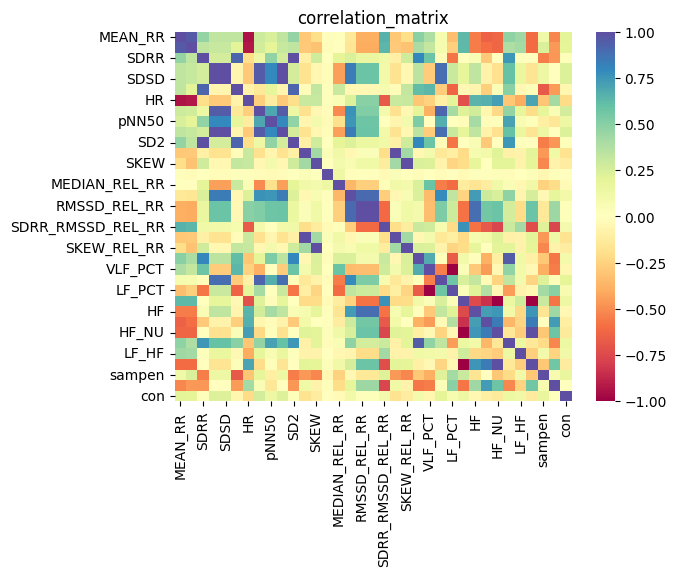

In [4]:
df = pd.concat([train_df, test_df], ignore_index=True)  #joins the test and the train data into one dataframe 'df'
df['con'] = df['condition'].map({'no stress': 1, 'interruption': 3, 'time pressure': 2}) #new column 'con' to df has value for each stress condition
df['con'] = df['con'].astype(float) #makes sure the type of the values in con are floats
#print(df['condition'])



def analyze_data(df):
    pd.set_option('display.max_columns', None)
    numeric_data = df.select_dtypes(include=['number']).drop(columns=['datasetId'], errors='ignore')
    correlation_matrix = numeric_data.corr(numeric_only=True)
    #print(df.describe(include='all'))
    numeric_data = df.select_dtypes(include=['number']).drop(columns=['datasetId'], errors='ignore')
    correlation_matrix = numeric_data.corr(numeric_only=True)
    #correlation_matrix = create_corr(df)
    plt.figure()
    #sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    sns.heatmap(correlation_matrix, cmap='Spectral')
    plt.title('correlation_matrix')
    plt.show()

    '''condition_counts = df['condition'].value_counts()
    labels = condition_counts.index
    sizes = condition_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title('condition_counts')
    plt.show()'''

analyze_data(df)
#df

Featrure selection

# Taheli: now added the features were selected: from data science course rec 4 of PCA

In [5]:
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition,con
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,199.061782,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress,1.0
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,114.634458,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption,3.0
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,118.939253,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption,3.0
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,127.318597,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress,1.0
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,87.718281,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress,1.0


In [16]:
# prompt: print dimentions of df

df.shape


(410322, 37)

In [ ]:
# prompt: print the df without its last 3 columns

print(df.iloc[:, :-3])


In [6]:
df.groupby('con').size()

,0
con,
1.0,222240
2.0,71150
3.0,116932


In [7]:
X = df.drop(['datasetId', 'condition','con'], axis=1).values
n, p = X.shape
print(f'n = {n}, p = {p}')

n = 410322, p = 34


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X_s = scaler.fit_transform(X)

In [9]:
# all columns means are zeros
X_s.mean(axis=0)

array([-7.05915711e-16,  1.88345204e-15,  3.89019905e-16, -7.87996919e-17,
       -2.91699991e-16, -3.89885741e-16, -1.39099942e-15,  1.70872643e-16,
       -2.83613087e-16, -3.98890430e-17, -8.99949454e-17,  3.09622787e-17,
       -1.09658070e-17,  1.96111748e-18,  1.19597862e-16, -2.70162332e-16,
       -3.50373336e-16,  1.87912286e-16, -7.71597994e-16,  3.09622787e-17,
       -1.09658070e-17,  3.31563059e-16,  1.18652370e-15,  5.51628148e-16,
       -5.45874671e-16,  1.29199978e-16, -2.08471551e-16,  1.05891686e-16,
       -1.20939907e-16,  1.43676748e-16,  6.67905531e-17,  3.68828621e-16,
        1.43656834e-15,  4.64018579e-16])

In [10]:
# all columns stds are ones
X_s.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
eigvals, eigvecs = np.linalg.eig(X_s.T @ X_s)

print(eigvals)
print(eigvecs.shape)

[ 3.89718194e+06+0.00000000e+00j  3.50557291e+06+0.00000000e+00j
  2.62914559e+06+0.00000000e+00j  1.02819745e+06+0.00000000e+00j
  5.50819285e+05+0.00000000e+00j  4.22821268e+05+0.00000000e+00j
  4.10846278e+05+0.00000000e+00j  3.97087415e+05+0.00000000e+00j
  2.87555651e+05+0.00000000e+00j  2.08167159e+05+0.00000000e+00j
  1.53248575e+05+0.00000000e+00j  1.04348836e+05+0.00000000e+00j
  9.33052885e+04+0.00000000e+00j  8.66076622e+04+0.00000000e+00j
  4.78504545e+04+0.00000000e+00j  3.62273717e+04+0.00000000e+00j
  2.40159472e+04+0.00000000e+00j  1.97148829e+04+0.00000000e+00j
  1.76685284e+04+0.00000000e+00j  1.06562170e+04+0.00000000e+00j
  7.69054508e+03+0.00000000e+00j  5.81043840e+03+0.00000000e+00j
  3.37538811e+03+0.00000000e+00j  2.12724967e+03+0.00000000e+00j
  9.05553431e+02+0.00000000e+00j  6.71678609e-02+0.00000000e+00j
  4.96279778e-02+0.00000000e+00j  1.70713178e-05+0.00000000e+00j
 -7.40145207e-10+0.00000000e+00j -3.27353097e-11+0.00000000e+00j
  6.52166070e-12+2.299023

In [12]:
W = eigvecs
v1 = W[:, 0]
v1 = v1[:, np.newaxis]
print(v1)

[[-0.28295053+0.j]
 [-0.26989376+0.j]
 [-0.12215162+0.j]
 [-0.0289691 +0.j]
 [-0.02894306+0.j]
 [-0.10864   +0.j]
 [ 0.27761418+0.j]
 [-0.02016992+0.j]
 [-0.01616832+0.j]
 [-0.02894306+0.j]
 [-0.12224444+0.j]
 [ 0.08873303+0.j]
 [ 0.05035597+0.j]
 [ 0.00956953+0.j]
 [-0.04617582+0.j]
 [ 0.11691655+0.j]
 [ 0.2131549 +0.j]
 [ 0.21315511+0.j]
 [-0.26948876+0.j]
 [ 0.08873303+0.j]
 [ 0.05035597+0.j]
 [-0.15564337+0.j]
 [-0.16206424+0.j]
 [ 0.0143097 +0.j]
 [ 0.13838213+0.j]
 [-0.26896817+0.j]
 [ 0.24905173+0.j]
 [ 0.2835374 +0.j]
 [ 0.26896817+0.j]
 [-0.13679263+0.j]
 [-0.12611422+0.j]
 [ 0.26451344+0.j]
 [-0.03785537+0.j]
 [ 0.24899987+0.j]]


In [17]:
# print it nicer
pd.Series(v1.flatten(), index=df.columns[:-3]).rename('First PC direction')

,First PC direction
MEAN_RR,-0.282951+0.000000j
MEDIAN_RR,-0.269894+0.000000j
SDRR,-0.122152+0.000000j
RMSSD,-0.028969+0.000000j
SDSD,-0.028943+0.000000j
SDRR_RMSSD,-0.108640+0.000000j
HR,0.277614+0.000000j
pNN25,-0.020170+0.000000j
pNN50,-0.016168+0.000000j
SD1,-0.028943+0.000000j


In [ ]:
'''corr = train_df.corr()


def feature_selection(correlation,threshold):
    selected_features = []
    for i in range(corr.shape[0]):
      if corr.iloc[i,35] > threshold:
        selected_features.append(train_df.iloc[:,i])
    return pd.DataFrame(selected_features).T

correlation_matrix = create_corr(df)
CORRELATION_THRESHOLD = 0.1
reduced_train = feature_selection(correlation_matrix,CORRELATION_THRESHOLD)
print(reduced_train)'''

def anova_f_test_feature_selection(df, top_n=15):
    # Remove near-constant features (zero variance)
    numeric_data = df.select_dtypes(include=['number']).drop(columns=['datasetId'], errors='ignore')
    numeric_data = numeric_data.loc[:, numeric_data.var() > 0]  # Keep only features with variance > 0

    # Ensure 'con' is categorical for ANOVA
    df['con'] = df['con'].astype(int)

    # Apply ANOVA F-test
    F_values, p_values = f_classif(numeric_data, df['con'])

    # Store results in a DataFrame
    anova_results = pd.DataFrame({'Feature': numeric_data.columns, 'F_value': F_values, 'p_value': p_values})
    anova_results = anova_results.sort_values(by='F_value', ascending=False)

    # Select the top N features
    selected_features = anova_results.head(top_n)['Feature'].tolist()

    print(f"\nTop {top_n} Features Based on ANOVA F-Test: {selected_features}")

    return anova_results  # Return full results

# Run ANOVA F-Test feature selection
anova_results_df = anova_f_test_feature_selection(df, top_n=15)

# Display results
print(anova_results_df.head(15))  # Instead of using ace_tools'''



Top 15 Features Based on ANOVA F-Test: ['con', 'MEAN_RR', 'MEDIAN_RR', 'HR', 'pNN25', 'SDSD', 'SD1', 'RMSSD', 'LF', 'SDRR_RMSSD_REL_RR', 'VLF', 'VLF_PCT', 'LF_PCT', 'LF_NU', 'HF_NU']
              Feature       F_value  p_value
34                con           inf      0.0
0             MEAN_RR  2.708594e+04      0.0
1           MEDIAN_RR  2.530009e+04      0.0
6                  HR  2.497688e+04      0.0
7               pNN25  1.573389e+04      0.0
4                SDSD  1.158482e+04      0.0
9                 SD1  1.158482e+04      0.0
3               RMSSD  1.158262e+04      0.0
23                 LF  1.151590e+04      0.0
18  SDRR_RMSSD_REL_RR  1.059538e+04      0.0
21                VLF  1.059285e+04      0.0
22            VLF_PCT  1.055204e+04      0.0
24             LF_PCT  1.005017e+04      0.0
25              LF_NU  9.802518e+03      0.0
28              HF_NU  9.802518e+03      0.0


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


  Feature chose plot

<ipython-input-28-27b5870a4c60>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


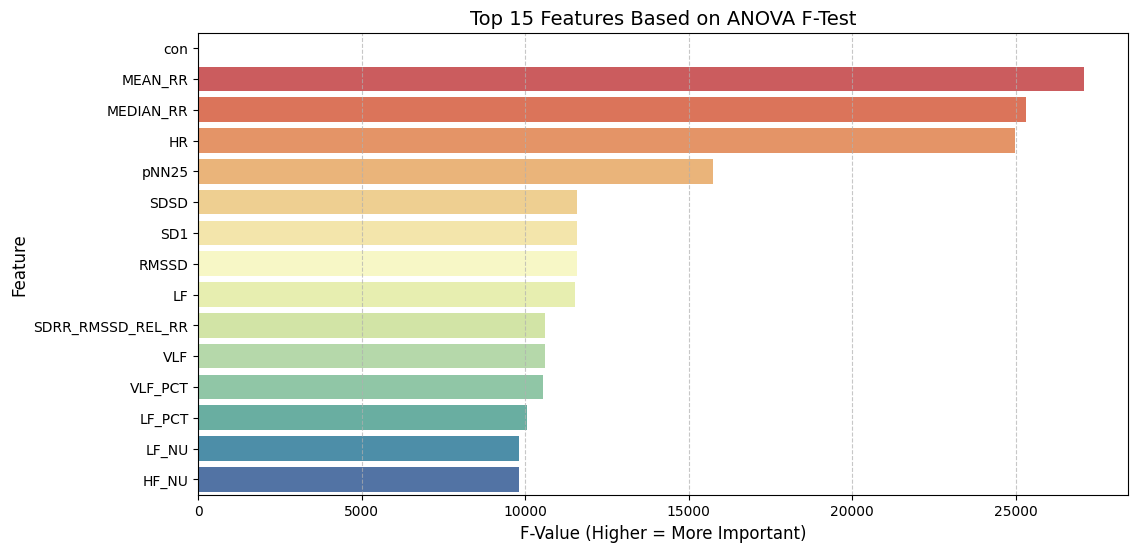

In [ ]:
def plot_anova_results(anova_results_df, top_n=15):
    """
    Plots the top N features based on ANOVA F-values in a visually appealing way.
    """
    # Select the top N features
    top_features = anova_results_df.head(top_n)

    # Create a figure
    plt.figure(figsize=(12, 6))

    # Use Seaborn for a clean bar plot
    sns.barplot(
        y=top_features['Feature'],
        x=top_features['F_value'],
        palette="Spectral"
    )

    # Titles and labels
    plt.xlabel('F-Value (Higher = More Important)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(f'Top {top_n} Features Based on ANOVA F-Test', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()
plot_anova_results(anova_results_df, top_n=15)

# Example usage (assuming `anova_results_df` is defined)
# plot_anova_results(anova_results_df, top_n=15)'''


# C. DATA PREPROCESSING


Step 1. Initial Data Preprocessing.

The collected HRV data in the SWELL−KW dataset are time-variant. For classification, we re-construct the HRV data, which was a discrete time series with timestamps, to a series indexed with sequence numbers without timestamps.
Moreover, we convert all data into the numerical format.
We also remove participants’ noisy, incomplete, or missing data.
These processing steps result in 25 participant’s data with 410322 number of records and 34 number of features for stress level classification.

In [ ]:
# code to replicate Step 1
#X = df.drop(columns=['datasetId', 'condition','con'])
#anova_results_df = anova_f_test_feature_selection(df, top_n=15)
#selected_features = anova_results_df.head(15)['Feature'].tolist()
#X = df[selected_features]
#y = df.condition
#onehot_encoder = OneHotEncoder(sparse_output=False)
#y = onehot_encoder.fit_transform(y.to_numpy().reshape(-1, 1))
X_train = reduced_train.iloc[:,:-1]
y_train = reduced_train.iloc[:,-1]
X_test = test_df[X_train.columns]
y_test = test_df['condition']
X_train.head()

,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT
0,885.157845,853.763730,9.063146,-0.000179,2.143342,2661.894136,72.203287
1,939.425371,948.357865,6.272369,0.000611,2.930855,2314.265450,76.975728
2,898.186047,907.006860,5.182201,-0.000263,2.127053,1373.887112,51.152225
3,881.757865,893.460030,5.748591,0.000494,2.050988,2410.357408,70.180308
4,809.625331,811.184865,3.266724,-0.002736,1.816544,1151.177330,43.918366


In [ ]:
X_test.head()

,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT
0,721.901897,727.267280,6.044877,-0.000951,1.570800,1016.073759,59.818117
1,843.538633,844.407930,3.031234,-0.001543,1.918953,765.518473,32.452560
2,958.523868,966.671125,6.224565,-0.002000,2.298473,2237.739905,51.696218
3,824.838669,842.485905,10.008830,0.000445,2.116033,2330.980957,81.661325
4,756.707933,747.941620,10.777899,-0.000170,1.681034,4750.624447,89.465158


Step 2. Further data preprocessing steps are performed as follows.

Splitting data for training and testing as 80|20 for train|test datasets, respectively;
Normalization with a standard scalar method to confine the feature values within the range of {0,1}, as some of the selected features were in different magnitudes; and
Reshaping of each row of the training features into a 1D vector so that it becomes an input to the input layer of the deep learning model.

In [ ]:
# code to replicate Step 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = StandardScaler().fit_transform(X_train).reshape(-1, 1, 15)
X_test = StandardScaler().fit_transform(X_test).reshape(-1, 1, 15)
X_train.shape

(328257, 1, 15)

# IV. A CNN MODEL FOR STRESS STATUS CLASSIFICATION

A. FEATURE RANKING AND EXTRACTION

---


Firstly, we rank the essential features based on their relevance to the classification task. To do so, the ANOVA [31] Ftest is adopted to select the significant features from the SWELL−KW dataset for feature ranking and extraction. ANOVA is a popular tool to perform a parametric statistical hypothesis test that assesses whether the means of two or more data samples (typically three or more) are from the same distribution or not. An F-statistic or F-test is a statistical test method that adopts ANOVA to calculate the ratio between variance values, such as variance from two different samples, or explained and unexplained variance. Furthermore, ANOVA can be used when one variable is numeric, and the other one is categorical, such as when a numerical input data and a classification outcome variable are compared in a classification task. In this study, we first employ all features for stress classification and then drop the minor significant features based on the importance of features (i.e., feature ranking) before performing the classification task. In the latter case, the training time is shortened while keeping the accuracy of the model.

B. A CNN DL MODEL FOR STRESS CLASSIFICATION

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Softmax

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=2, activation='gelu', padding='same'))
model.add(Dense(units=16, activation='gelu'))
model.add(MaxPool1D(pool_size=1, strides=1))
model.add(Flatten())
model.add(Dense(units=3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=50,  # number of epochs
                    batch_size=64,  # batch size
                    validation_split=0.05)

Epoch 1/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9616 - loss: 0.1038 - val_accuracy: 1.0000 - val_loss: 1.6400e-05
Epoch 2/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 1.0000 - loss: 9.1041e-06 - val_accuracy: 1.0000 - val_loss: 8.5861e-07
Epoch 3/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 1.0000 - loss: 5.0169e-07 - val_accuracy: 1.0000 - val_loss: 4.4690e-08
Epoch 4/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 1.0000 - loss: 2.4782e-08 - val_accuracy: 1.0000 - val_loss: 2.0119e-09
Epoch 5/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 1.0000 - loss: 1.1930e-09 - val_accuracy: 1.0000 - val_loss: 1.0168e-10
Epoch 6/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 1.0000 - loss: 2.2367e-11 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/50
4873/4873 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 1.0000 - loss: 8.2523e-13 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50
4873/4873 ━━━━━━━━━━

KeyboardInterrupt: 

# Testing

In [ ]:
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Assuming a multi-class classification problem
y_test_classes = np.argmax(y_test, axis=1)

NameError: name 'model' is not defined

Precision: 1.0
Recall: 1.0
Accuracy: 1.0
F1 Score: 1.0
Matthews Correlation Coefficient: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23362
           1       1.00      1.00      1.00     44597
           2       1.00      1.00      1.00     14106

    accuracy                           1.00     82065
   macro avg       1.00      1.00      1.00     82065
weighted avg       1.00      1.00      1.00     82065



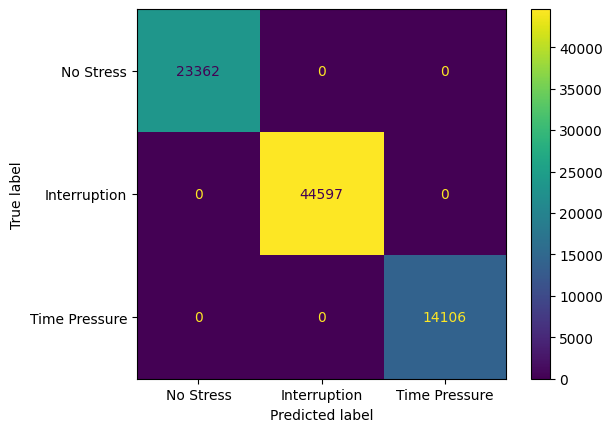

In [ ]:

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, matthews_corrcoef, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Assuming you have true labels in y_test
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
mcc = matthews_corrcoef(y_test_classes, y_pred_classes)
report = classification_report(y_test_classes, y_pred_classes)
cm = confusion_matrix(y_test_classes, y_pred_classes)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient:", mcc)
print("Classification Report:\n", report)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Stress', "Interruption", "Time Pressure"])
disp.plot()